# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective of the particular implementation) are powerful algorithms that can produce models with predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact that DTs can model nonlinear relationships and also have a number of tuning parameters that allow for the practitioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fantastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also because it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [54]:
# Standard library
import zipfile

# Third-party libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Third-party libraries for machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Third-party libraries for boosting algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Visualization
import graphviz
from pdpbox import pdp

In [55]:
zip_filename = 'GermanCredit.csv.zip'

# Read the CSV file from the ZIP archive directly into a DataFrame
with zipfile.ZipFile(zip_filename, 'r') as z:
    with z.open('GermanCredit.csv') as f:
        df = pd.read_csv(f)

# Show the first few rows of the dataset
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [57]:
# Check for missing values
missing_values_count = df.isnull().sum()

# Display columns with missing values, if any
print(f"Number of missing values: {len(missing_values_count[missing_values_count > 0])}")

Number of missing values: 0


In [58]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Show the dimensions of the training and test sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((700, 61), (300, 61)), ((700,), (300,)))

In [59]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.6533333333333333
              precision    recall  f1-score   support

         Bad       0.44      0.48      0.46        91
        Good       0.76      0.73      0.75       209

    accuracy                           0.65       300
   macro avg       0.60      0.61      0.60       300
weighted avg       0.66      0.65      0.66       300



In [60]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.6757142857142857


In [61]:
# Initialize the Decision Tree classifier with the best parameters
dt_model_best = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the model to the training data
dt_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = dt_model_best.predict(X_test)

# Evaluate the model
accuracy_dt_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(accuracy_dt_best)
print(classification_rep_best)

0.6933333333333334
              precision    recall  f1-score   support

         Bad       0.49      0.33      0.39        91
        Good       0.74      0.85      0.79       209

    accuracy                           0.69       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.67      0.69      0.67       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [62]:
#!pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [63]:
# Export the decision tree to a DOT-format string
dot_data = export_graphviz(dt_model_best, 
                           out_file=None, 
                           feature_names=X.columns, 
                           class_names=['Bad', 'Good'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Render the DOT string using graphviz
# Attention: here I installed the GraphViz package for Windows and 
# added the bin folder to my system PATH env variable to be able to run dot.exe
graph = graphviz.Source(dot_data)
graph.render(filename="best_decision_tree", format="png", cleanup=True)  # Save as PNG
graph.view("best_decision_tree")  # Open the PNG as PDF

'best_decision_tree.pdf'

#### Here is a small extract of the original exported png 

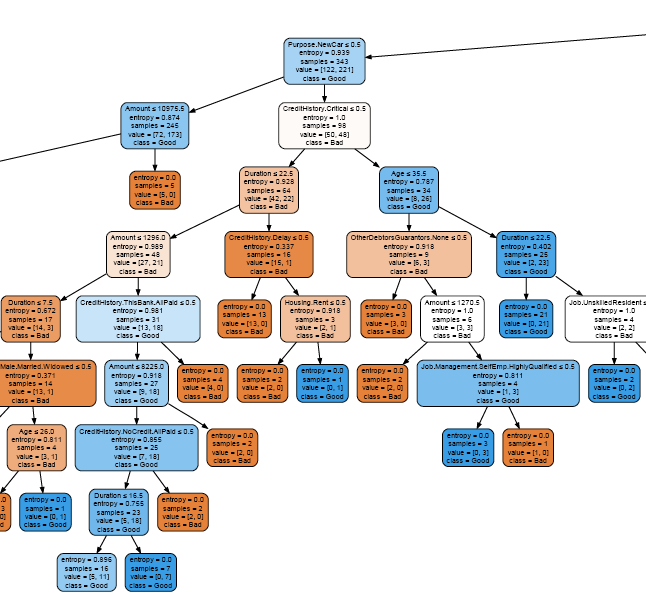

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [64]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Initial Random Forest Model:")
print(accuracy_rf)
print(classification_rep_rf)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Random Forest Parameters:")
print(best_params_rf)
print("Best Score:", best_score_rf)

# Initialize the Random Forest classifier with the best parameters
rf_model_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the model to the training data
rf_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_best = rf_model_best.predict(X_test)

# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
classification_rep_rf_best = classification_report(y_test, y_pred_rf_best)

print("Best Random Forest Model:")
print(accuracy_rf_best)
print(classification_rep_rf_best)

Initial Random Forest Model:
0.7533333333333333
              precision    recall  f1-score   support

         Bad       0.67      0.37      0.48        91
        Good       0.77      0.92      0.84       209

    accuracy                           0.75       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.74      0.75      0.73       300

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Random Forest Parameters:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.7714285714285714
Best Random Forest Model:
0.7566666666666667
              precision    recall  f1-score   support

         Bad       0.71      0.33      0.45        91
        Good       0.76      0.94      0.84       209

    accuracy                           0.76       300
   macro avg       0.74      0.64      0.65       300
weighted avg       0.75      0.76      0.72       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

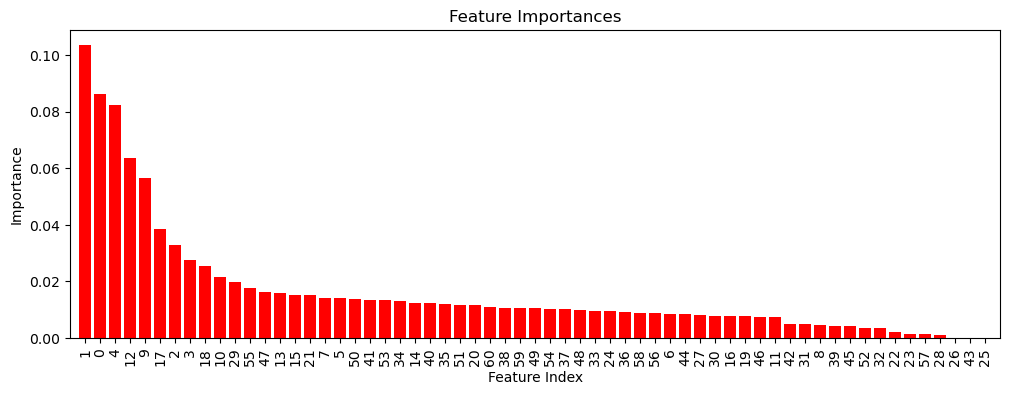

 Feature Index                           Feature Name
             1                                 Amount
             0                               Duration
             4                                    Age
            12             CheckingAccountStatus.none
             9             CheckingAccountStatus.lt.0
            17                 CreditHistory.Critical
             2              InstallmentRatePercentage
             3                      ResidenceDuration
            18                         Purpose.NewCar
            10         CheckingAccountStatus.0.to.200
            29             SavingsAccountBonds.lt.100
            55                            Housing.Own
            47                    Property.RealEstate
            13         CreditHistory.NoCredit.AllPaid
            15                 CreditHistory.PaidDuly
            21               Purpose.Radio.Television
             7                              Telephone
             5              

In [65]:
# Get feature importances from the best Random Forest model
importances = rf_model_best.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances with numerical indices on the x-axis
plt.figure(figsize=(12, 4))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Create a table mapping feature indices to feature names
feature_mapping = pd.DataFrame({
    'Feature Index': indices,
    'Feature Name': [X.columns[i] for i in indices]
})
features = [x for i,x in enumerate(X.columns) if i!=61]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Display the feature_mapping DataFrame without the index column
print(feature_mapping.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [66]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

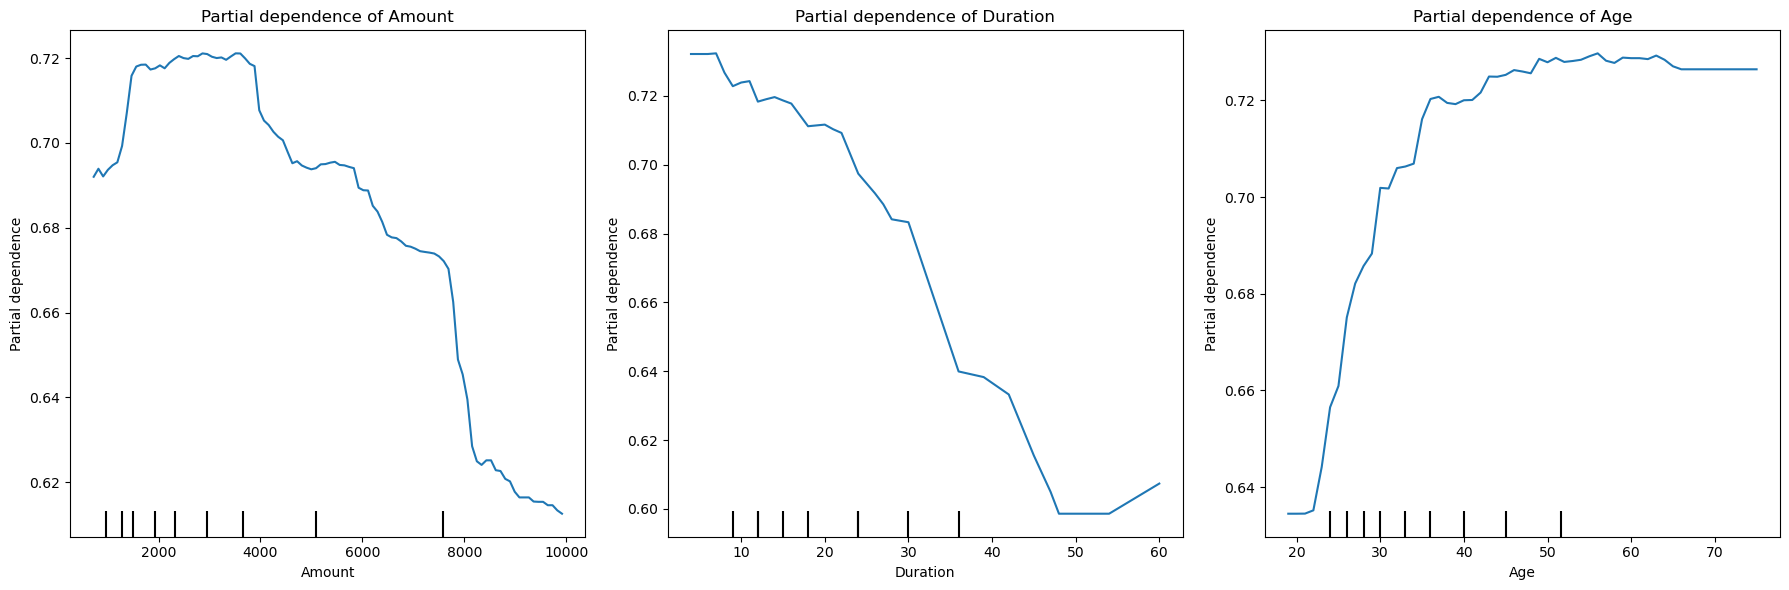

In [67]:
# Create a 1-row, 3-column figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# List of variables to plot
variables = ['Amount', 'Duration', 'Age']

# Loop through each variable and plot its Partial Dependence Plot in one of the subplots
for ax, var in zip(axs, variables):
    disp = PartialDependenceDisplay.from_estimator(
        rf_model_best, X_train, [var], ax=ax)
    ax.set_title(f'Partial dependence of {var}')

plt.tight_layout()
plt.show()

In [75]:
pdp_amount_duration = pdp.PDPInteract(model=rf_model_best,df=df,model_features=X.columns,features=["Amount","Duration"],feature_names=["Amount","Duration"])
fig, _ = pdp_amount_duration.plot()
fig

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

In [76]:
pdp_amount_age = pdp.PDPInteract(model=rf_model_best,df=df,model_features=X.columns,features=["Amount","Age"],feature_names=["Amount","Age"])
fig, _ = pdp_amount_age.plot()
fig

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

In [77]:
pdp_duration_age = pdp.PDPInteract(model=rf_model_best,df=df,model_features=X.columns,features=["Duration","Age"],feature_names=["Duration","Age"])
fig, _ = pdp_duration_age.plot()
fig

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [78]:
#! conda install -c anaconda py-xgboost

In [79]:
#! conda install -c conda-forge catboost

In [80]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

## XGBoost

In [81]:
# Map 'Bad' to 0 and 'Good' to 1 in the training and test set
y_train_num = y_train.map({'Bad': 0, 'Good': 1})
y_test_num = y_test.map({'Bad': 0, 'Good': 1})

# Initialize an XGBoost classifier object
xgb_clf = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train_num)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Compute the accuracy of the best model
accuracy_xgb_best = accuracy_score(y_test_num, y_pred)

print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy_xgb_best)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Test Set Accuracy: 0.76


## CatBoost

In [82]:
# Initialize a CatBoost classifier object
cat_clf = CatBoostClassifier(verbose=0)  # verbose=0 to turn off training output

# Define the hyperparameter grid
param_grid_cat = {
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [50, 100, 150],
    'depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search_cat = GridSearchCV(estimator=cat_clf, param_grid=param_grid_cat, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_cat.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_cat = grid_search_cat.best_params_
best_cat_model = grid_search_cat.best_estimator_

# Make predictions using the best model
y_pred_cat = best_cat_model.predict(X_test)

# Compute the accuracy of the best model
accuracy_cat_best = accuracy_score(y_test, y_pred_cat)

print("Best Parameters for CatBoost:", best_params_cat)
print("Test Set Accuracy for CatBoost:", accuracy_cat_best)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for CatBoost: {'depth': 5, 'iterations': 50, 'learning_rate': 0.1}
Test Set Accuracy for CatBoost: 0.76


## LightGBM

In [83]:
# Initialize a LightGBM classifier object
lgb_clf = LGBMClassifier()

# Define the hyperparameter grid
param_grid_lgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Create a GridSearchCV object
grid_search_lgb = GridSearchCV(estimator=lgb_clf, param_grid=param_grid_lgb, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_lgb.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_lgb = grid_search_lgb.best_params_
best_lgb_model = grid_search_lgb.best_estimator_

# Make predictions using the best model
y_pred_lgb = best_lgb_model.predict(X_test)

# Compute the accuracy of the best model
accuracy_lgb_best = accuracy_score(y_test, y_pred_lgb)

print("Best Parameters for LightGBM:", best_params_lgb)
print("Test Set Accuracy for LightGBM:", accuracy_lgb_best)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 491, number of negative: 209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.701429 -> initscore=0.854110
[LightGBM] [Info] Start training from score 0.854110
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [84]:
accuracy_list = {
    'Decision Tree': 'accuracy_dt_best',
    'Random Forest': 'accuracy_rf_best',
    'XGBoost': 'accuracy_xgb_best',
    'CATBoost': 'accuracy_cat_best',
    'LightGBM': 'accuracy_lgb_best'
}

# Retrieve the values of these variables and store them in the dictionary
accuracy_values = {model: eval(var_name) for model, var_name in accuracy_list.items()}

# Create a DataFrame to display the accuracy values
accuracy_df = pd.DataFrame(list(accuracy_values.items()), columns=['Model', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=True)
# Display the accuracy comparison
print(accuracy_df.to_string(index=False))

        Model  Accuracy
Decision Tree  0.693333
     LightGBM  0.720000
Random Forest  0.756667
      XGBoost  0.760000
     CATBoost  0.760000
